In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


[Q1 10 points] Read in data

In [2]:
gold = pd.read_csv('gold.txt',sep="\t",header=None, names=["url","category"])
labels = pd.read_table('labels.txt', sep="\t",header=None, names =['turk','url','category'])

In [3]:
gold.shape

(1517, 2)

In [4]:
gold[['url']].drop_duplicates().shape

(1517, 1)

In [5]:
gold.iloc[:5]

,url,category
0,http://0800-horoscope.com,G
1,http://18games.net,X
2,http://1pixelout.net,G
3,http://1porno.com/004/teens/index.html,X
4,http://1stpussy.com/005/16/index.html,X


In [6]:
labels.shape

(92721, 3)

In [7]:
labels.iloc[:5]

,turk,url,category
0,A1OT3A29R9N1DG,http://000.cc,P
1,A1PXXEOGQ76RNJ,http://000.cc,G
2,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
4,A2LGX47NN7C5D3,http://000.cc,G


[Q2 10 points] Split into two DataFrames

In [8]:
gold['url'].nunique()

1517

In [9]:
labels['url'].nunique()

11040

In [10]:
url_in_gold_list = labels['url'][labels['url'].isin(gold['url'].unique())].unique()

In [11]:
len(url_in_gold_list)

333

In [12]:
url_in_gold_list[0:5]

array(['http://0800-horoscope.com', 'http://18games.net',
       'http://1pixelout.net', 'http://1porno.com/004/teens/index.html',
       'http://1stpussy.com/005/16/index.html'], dtype=object)

In [13]:
labelongold = labels[labels['url'].isin(url_in_gold_list)]
labelsunknown = labels[~labels['url'].isin(url_in_gold_list)]

In [14]:
labelongold.shape

(3324, 3)

In [15]:
labelsunknown.shape

(89397, 3)

[Q3 10 points] Compute accuracies of turks

In [16]:
turks_merged = labels.merge(gold,how="left",on = "url",suffixes=["_turks","_gold"])
turks_merged.shape

(92721, 4)

In [17]:
turks_merged[0:5]

,turk,url,category_turks,category_gold
0,A1OT3A29R9N1DG,http://000.cc,P,NaN
1,A1PXXEOGQ76RNJ,http://000.cc,G,NaN
2,A1PXXEOGQ76RNJ,http://000.cc,G,NaN
3,A21US576U8SCO4,http://000.cc,G,NaN
4,A2LGX47NN7C5D3,http://000.cc,G,NaN


In [18]:
turks_merged_sub = turks_merged.dropna(subset = ['category_gold'])
turks_merged_sub[0:5]

,turk,url,category_turks,category_gold
245,A1253FXHCZ9CWM,http://0800-horoscope.com,G,G
246,A153PKAL7OAY36,http://0800-horoscope.com,G,G
247,A1FV9SAPL5C6KY,http://0800-horoscope.com,G,G
248,A1JTOT0DWM6QGL,http://0800-horoscope.com,G,G
249,A1PXXEOGQ76RNJ,http://0800-horoscope.com,G,G


In [19]:
turks_merged_sub.shape

(3324, 4)

In [20]:
turks_merged_sub.loc[:,'isMatch'] = (turks_merged_sub['category_turks']==turks_merged_sub['category_gold']).astype(int).copy()

In [21]:
turks_merged_sub['isMatch'].sum()

2264

In [22]:
rater_goodness = turks_merged_sub.groupby(['turk'])['isMatch'].agg(['count','mean']).round(5)
rater_goodness

,count,mean
turk,,
A112DVP1KG4QZU,1,1.00000
A1253FXHCZ9CWM,29,0.51724
A12CY1Q7XKJJDE,1,1.00000
A12RE8G66WTO8B,20,0.75000
A12Y1GTGIQDGRA,3,0.33333
...,...,...
AYWOBMTEGFVVI,1,0.00000
AZ1S5BIG5R6P6,35,0.71429
AZSDW7JJL5VA7,100,0.68000


[Q4 10 points] Odds ratios

In [23]:
rater_goodness.shape

(269, 2)

In [24]:
rater_goodness['odds'] = rater_goodness['mean'].map(lambda x : ((x)/(1.001 - x)))

<AxesSubplot:ylabel='Frequency'>

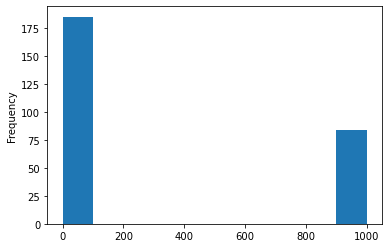

In [25]:
rater_goodness['odds'].plot(kind='hist')

[Q5 10 points] Most accurate turks

In [26]:
rater_goodness[rater_goodness['count'] >= 20].sort_values('odds',ascending = False)[0:10]

,count,mean,odds
turk,,,
A2U0R4X38GUKZE,20,0.95000,18.627451
A22C0PJUBFJTI0,36,0.91667,10.870034
A23YQUBXZPKILZ,24,0.87500,6.944444
ATVALOQVDCMZW,103,0.85437,5.826707
A1HIXWH4OXT8S4,40,0.82500,4.687500
A3220HG1O83HQ4,22,0.81818,4.475331
A32W20KGQXS0LL,25,0.80000,3.980100
A20PWAB7G3HDHU,20,0.80000,3.980100
AJSJVK40F5HM6,28,0.78571,3.649542


In [27]:
rater_goodness[rater_goodness['count'] >= 20].sort_values('odds',ascending = False)[0:10].index.values

array(['A2U0R4X38GUKZE', 'A22C0PJUBFJTI0', 'A23YQUBXZPKILZ',
       'ATVALOQVDCMZW', 'A1HIXWH4OXT8S4', 'A3220HG1O83HQ4',
       'A32W20KGQXS0LL', 'A20PWAB7G3HDHU', 'AJSJVK40F5HM6',
       'A31OCN4MNHUQ6W'], dtype=object)

[Q6 10 points] Rating counts versus accuracy

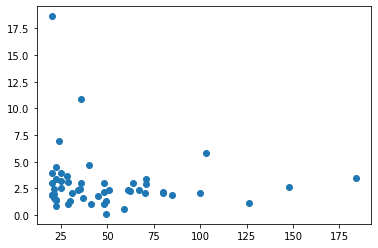

In [28]:
#Outlier removal
rater_goodness_sub = rater_goodness[rater_goodness['count'] >=20 ].sort_values('odds',ascending = False)
scatter(rater_goodness_sub['count'] , rater_goodness_sub['odds'] , marker='o')

Upon removing outliers with low number of counts (less than 20) that give out highly volatile odds, we see a very small negative correlation between number of questions and odds.


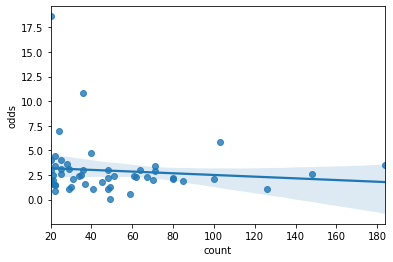

In [29]:
sns.regplot(x="count",
            y="odds", 
            data=rater_goodness_sub)

print("Upon removing outliers with low number of counts (less than 20) that give out highly volatile odds, we see a very small negative correlation between number of questions and odds.")

In [30]:
print("In case you keep low values of n counts in your data and only remove outliers based on say odds > 500 or so, you can avail a positive correlation but it's not trustworthy due to higher volatility of odds for low values of count")

In case you keep low values of n counts in your data and only remove outliers based on say odds > 500 or so, you can avail a positive correlation but it's not trustworthy due to higher volatility of odds for low values of count


[Q7 13 points] Overall predicted odds

Consider each urluthat isnotin the gold set, and each categoryc.  For thepair (u, c), calculate the product of odds of all turks who (a) rated urluascategoryc, and (b) have rated more gold set urls than 75% of all turks whorated at least one gold-set url.For example, if you find that there are 269 turks who rated at least onegold-set url, you want to select only the turks who have rated more gold-seturls than 75% of these 269 turks.  We can think of these as our “reliable”turks.  Now, our belief that urlubelongs to categorycdepends on how many“reliable” turks rateduasc; specifically, our belief is based on the productof their reliability scores (i.e., their odds).We shall call such products of odds theoverall oddshenceforth.

In [38]:
labelsunknown[0:5]

,turk,url,category
0,A1OT3A29R9N1DG,http://000.cc,P
1,A1PXXEOGQ76RNJ,http://000.cc,G
2,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
4,A2LGX47NN7C5D3,http://000.cc,G


In [32]:
rater_goodness['count'].quantile(0.75)

11.0

In [37]:
rater_goodness_sub2 = rater_goodness[rater_goodness['count'] > rater_goodness['count'].quantile(0.75)]
top_turks = rater_goodness_sub2.reset_index()['turk'].unique()
labelsunknown_rel = labelsunknown[labelsunknown['turk'].isin(top_turks)]
labelsunknown_rel.shape

(40621, 3)

In [39]:
labelsunknown_rel

,turk,url,category
1,A1PXXEOGQ76RNJ,http://000.cc,G
2,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
10,A1PXXEOGQ76RNJ,http://0000.jp,G
11,A1XFA0A9Z3LAZJ,http://0000.jp,G
...,...,...,...
92707,A4GP97LAQCCHJ,http://zynga.com,G
92709,A1PXXEOGQ76RNJ,http://zz868.com,G
92715,A4AD9ZMVU9SVA,http://zz868.com,P
92719,A21US576U8SCO4,http://zzx.cc,G
